In [229]:
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
from sys import path
import matplotlib.pyplot as plt
import pymmwr as pm
from datetime import datetime
from datetime import date
from datetime import timedelta
path.append("./.local/lib/python3.9/site-packages") #pymmwr is installed locally

In [230]:
path='/projects/math_cheny/FluSight/2023manuscript/LANL_NAU_2022_submitted_result/'
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
onlyfiles.sort()
l=len(onlyfiles)
df = pd.read_table(path+onlyfiles[0],  header=0,sep=',') 

#Extract the target state with location ID -targetIndex
targetIndex =1 #state location ID

if targetIndex<10:
    targetID='0'+str(targetIndex)
else:
    targetID=str(targetIndex)
df_target=df[df['location']==targetID]
df_target

,forecast_date,target,target_end_date,location,type,quantile,value
368,2022-12-05,1 wk ahead inc flu hosp,2022-12-10,01,quantile,0.010,165.0
369,2022-12-05,1 wk ahead inc flu hosp,2022-12-10,01,quantile,0.025,173.0
370,2022-12-05,1 wk ahead inc flu hosp,2022-12-10,01,quantile,0.050,180.0
371,2022-12-05,1 wk ahead inc flu hosp,2022-12-10,01,quantile,0.100,188.0
372,2022-12-05,1 wk ahead inc flu hosp,2022-12-10,01,quantile,0.150,194.0
...,...,...,...,...,...,...,...
455,2022-12-05,4 wk ahead inc flu hosp,2022-12-31,01,quantile,0.850,137.0
456,2022-12-05,4 wk ahead inc flu hosp,2022-12-31,01,quantile,0.900,144.0
457,2022-12-05,4 wk ahead inc flu hosp,2022-12-31,01,quantile,0.950,156.0
458,2022-12-05,4 wk ahead inc flu hosp,2022-12-31,01,quantile,0.975,168.0


In [231]:
locations=pd.read_csv('/projects/math_cheny/FluSight/2023_2024_test/locations.csv',skiprows=0) 
locations=locations.drop([0]) #skip fist row for national ID
locations

,abbreviation,location,location_name,population,Unnamed: 4,count_rate1,count_rate2,count_rate2p5,count_rate3,count_rate4,count_rate5
1,AL,01,Alabama,5063778,NaN,51,101,127,152,203,253
2,AK,02,Alaska,711426,NaN,7,14,18,21,28,36
3,AZ,04,Arizona,7341018,NaN,73,147,184,220,294,367
4,AR,05,Arkansas,3041878,NaN,30,61,76,91,122,152
5,CA,06,California,38886551,NaN,389,778,972,1167,1555,1944
6,CO,08,Colorado,5803748,NaN,58,116,145,174,232,290
7,CT,09,Connecticut,3621089,NaN,36,72,91,109,145,181
8,DE,10,Delaware,1014872,NaN,10,20,25,30,41,51
9,DC,11,District of Columbia,668576,NaN,7,13,17,20,27,33
10,FL,12,Florida,22183852,NaN,222,444,555,666,887,1109


In [232]:
this_state=locations[locations['location'].astype(int)==targetIndex]
this_state['location_name']

1    Alabama
Name: location_name, dtype: object

In [233]:
#Extract hospitalization data
covid=pd.read_csv('/projects/math_cheny/FluSight/Data/rows.csv?accessType=DOWNLOAD') #read hospitalization data
HI=covid[['date','state','previous_day_admission_influenza_confirmed']].sort_values(['state','date'])
HI

,date,state,previous_day_admission_influenza_confirmed
26875,2020/03/23,AK,NaN
31631,2020/03/24,AK,NaN
29730,2020/03/25,AK,NaN
25360,2020/03/26,AK,NaN
26747,2020/03/27,AK,NaN
...,...,...,...
57066,2024/01/30,WY,7.0
48977,2024/01/31,WY,8.0
48444,2024/02/01,WY,4.0
58759,2024/02/02,WY,7.0


In [234]:
state_HI_data = HI[HI['state']==this_state['abbreviation'][1]]
state_HI_data

,date,state,previous_day_admission_influenza_confirmed
30278,2020/01/01,AL,NaN
30852,2020/01/02,AL,NaN
31141,2020/01/03,AL,NaN
26696,2020/01/04,AL,NaN
34470,2020/01/05,AL,NaN
...,...,...,...
55199,2024/01/30,AL,12.0
54456,2024/01/31,AL,12.0
55058,2024/02/01,AL,19.0
50286,2024/02/02,AL,15.0


In [235]:
d=datetime.strptime('2022/12/10','%Y/%m/%d')
pm.date_to_epiweek(date(d.year, d.month, d.day))

Epiweek(year=2022, week=49, day=7)

In [236]:
'''
Extract state level data
'''
targetSeason = 2022
#First submitted result has target end day at 2022, 12, 10, which is a Sunday
onset = pm.epiweek_to_date(pm.Epiweek(targetSeason, 49))
#Last submitted result has target end day at 2023, 6, 11, which is a Sunday
end = pm.epiweek_to_date(pm.Epiweek(targetSeason+1, 24))
print(onset)
print(end)
season2021Data = np.nan*np.zeros((1, (end-onset).days))
season2021dateArray = [[] ]

dateArray = [ datetime.strptime(state_HI_data['date'].values[i], '%Y/%m/%d')-timedelta(days=1) for i in range(len(state_HI_data))]
binary = [onset <= buff.date() < end for buff in dateArray] # previous day 

tSpan = np.array([(dateArray[i]-dateArray[0]).days for i in range(len(state_HI_data))])

season2021Data[:np.sum(binary)] = state_HI_data['previous_day_admission_influenza_confirmed'][binary]
season2021dateArray = np.array(dateArray)[binary]
print(season2021Data.shape)
print(season2021Data)


2022-12-04
2023-06-11
(1, 189)
[[35. 37. 33. 29. 32. 27. 30. 27. 19. 20. 16. 19. 22. 20. 21. 18. 25. 17.
  25. 27. 22. 15. 32. 21. 26. 18. 14. 14. 14. 24. 23. 16. 20. 14. 14. 14.
  17. 15. 14. 19.  6.  8. 11.  7.  6. 10.  7.  8.  8. 10.  6. 10.  2.  3.
   3.  8.  7.  5.  8.  2.  4.  2.  0.  3.  4.  7.  5.  4.  6.  4.  4.  3.
   4.  6.  6.  3.  5.  4.  3.  8.  5.  5.  1.  0.  4.  2.  3.  2.  2.  3.
   2.  4.  6.  1.  1.  1.  2.  1.  4.  5.  5.  2.  2.  3.  3.  5.  1.  2.
   4.  1.  4.  3.  5.  4.  2.  6.  5.  2.  2.  2.  4.  1.  2.  2.  4.  0.
   2.  0.  3.  3.  4.  4.  3.  2.  4.  4.  6.  0.  1.  2.  2.  4.  1.  2.
   0.  2.  1.  0.  0.  0.  2.  1.  1.  2.  1.  3.  0.  1.  3.  4.  3.  3.
   1.  1.  1.  2.  0.  1.  2.  2.  1.  1.  3.  1.  3.  4.  2.  4.  4.  5.
   3.  3.  4.  2.  1.  0.  3.  1.  0.]]


In [237]:
from os import listdir
from os.path import isfile, join
mypath='/projects/math_cheny/FluSight/2023manuscript/LANL_NAU_2022_submitted_result/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
l=len(onlyfiles)
onlyfiles.sort()
onlyfiles

['2022-12-05-LosAlamos_NAU-CModel_Flu.csv',
 '2022-12-12-LosAlamos_NAU-CModel_Flu.csv',
 '2022-12-19-LosAlamos_NAU-CModel_Flu.csv',
 '2022-12-26-LosAlamos_NAU-CModel_Flu.csv',
 '2023-01-02-LosAlamos_NAU-CModel_Flu.csv',
 '2023-01-09-LosAlamos_NAU-CModel_Flu.csv',
 '2023-01-16-LosAlamos_NAU-CModel_Flu.csv',
 '2023-01-23-LosAlamos_NAU-CModel_Flu.csv',
 '2023-01-30-LosAlamos_NAU-CModel_Flu.csv',
 '2023-02-06-LosAlamos_NAU-CModel_Flu.csv',
 '2023-02-13-LosAlamos_NAU-CModel_Flu.csv',
 '2023-02-20-LosAlamos_NAU-CModel_Flu.csv',
 '2023-02-27-LosAlamos_NAU-CModel_Flu.csv',
 '2023-03-06-LosAlamos_NAU-CModel_Flu.csv',
 '2023-03-13-LosAlamos_NAU-CModel_Flu.csv',
 '2023-03-20-LosAlamos_NAU-CModel_Flu.csv',
 '2023-03-27-LosAlamos_NAU-CModel_Flu.csv',
 '2023-04-03-LosAlamos_NAU-CModel_Flu.csv',
 '2023-04-10-LosAlamos_NAU-CModel_Flu.csv',
 '2023-04-17-LosAlamos_NAU-CModel_Flu.csv',
 '2023-05-01-LosAlamos_NAU-CModel_Flu.csv',
 '2023-05-08-LosAlamos_NAU-CModel_Flu.csv',
 '2023-05-15-LosAlamos_NAU-CMode

In [248]:
'''
Read the submission file
Convert the dates
'''
df_forecast = pd.read_table(mypath+onlyfiles[0],sep=',')
# list of unique and ordered date
target_dates = df_forecast['target_end_date'].unique()
df_forecast

,forecast_date,target,target_end_date,location,type,quantile,value
0,2022-12-05,1 wk ahead inc flu hosp,2022-12-10,11,quantile,0.010,43.0
1,2022-12-05,1 wk ahead inc flu hosp,2022-12-10,11,quantile,0.025,48.0
2,2022-12-05,1 wk ahead inc flu hosp,2022-12-10,11,quantile,0.050,53.0
3,2022-12-05,1 wk ahead inc flu hosp,2022-12-10,11,quantile,0.100,58.0
4,2022-12-05,1 wk ahead inc flu hosp,2022-12-10,11,quantile,0.150,62.0
...,...,...,...,...,...,...,...
4963,2022-12-05,4 wk ahead inc flu hosp,2022-12-31,US,quantile,0.850,2336.0
4964,2022-12-05,4 wk ahead inc flu hosp,2022-12-31,US,quantile,0.900,2359.0
4965,2022-12-05,4 wk ahead inc flu hosp,2022-12-31,US,quantile,0.950,2394.0
4966,2022-12-05,4 wk ahead inc flu hosp,2022-12-31,US,quantile,0.975,2426.0


In [239]:

def IS(alpha,predL,predU):
    
    return lambda y: (predU-predL)+2/alpha*(y<predL)*(predL-y) + 2/alpha*(y>predU)*(y-predU)

def WIS(yObs, qtlMark,predQTL):
    
    # checking if the qtlMark is well-defined
    ifWellDefined = np.mod(len(qtlMark),2)!=0
    
    NcentralizedQT = (len(qtlMark)-1)//2 + 1
    
    alphaList = np.zeros(NcentralizedQT)
    weightList = np.zeros(NcentralizedQT)
    
    for i in range(NcentralizedQT):
        
        ifWellDefined = ifWellDefined & (np.abs(-1.0+qtlMark[i]+qtlMark[-1-i])<1e-8)
        alphaList[i] = 1-(qtlMark[-1-i]-qtlMark[i])
        weightList[i] = alphaList[i]/2
        
    if ifWellDefined:
        
        #print(alphaList)
        #print(qtlMark)
        #print(NcentralizedQT)
        
        output = 1.0/2*np.abs(yObs-predQTL[NcentralizedQT-1])
        
        for i in range(NcentralizedQT-1):
            
            output += weightList[i]*IS(alphaList[i],predQTL[i],predQTL[-1-i])(yObs)
            
            #print(alphaList[i], predQTL[i],predQTL[-1-i])
            
        return output/(NcentralizedQT-1/2)
    
        
    else:
        
        print('Check the quantile marks: either no median defined, or not in symmetric central QTL form.')
        
        


In [261]:
# Target date is 1,2,3,4 week ahead forecasts
# save 4 weeks data
np_forecast=np.zeros((1,4))
# save 4 weeks 23 quantiles 
np_quantiles=np.zeros((23,4))
#save wis scores
np_wis=np.zeros((1,4))
for n_week_ahead in range(4):
#extract the end time
    end = datetime.strptime(target_dates[n_week_ahead],'%Y-%m-%d').date() #index starts at 0
    '''
    Convert the time frame of reported data
    to match the time frame of forecast data
    '''
    reported_data = np.nan*np.zeros((1, (end-onset).days+1))
    date_Array = [[] ]

    date_Array = [ datetime.strptime(state_HI_data['date'].values[i], '%Y/%m/%d')-timedelta(days=1) for i in range(len(state_HI_data))]
    binary = [onset <= buff.date() <= end for buff in date_Array] # previous day 

    tSpan = np.array([(dateArray[i]-dateArray[0]).days for i in range(len(state_HI_data))])

    reported_data[:np.sum(binary)] = state_HI_data['previous_day_admission_influenza_confirmed'][binary]
    date_Array = np.array(date_Array)[binary]

    '''
    load the forecast data
    '''
    df_this_state=df_forecast[df_forecast['location'].to_numpy()==str(targetIndex).zfill(2)]
    df_this_forecast=df_this_state[df_this_state['target_end_date']==target_dates[n_week_ahead]]

    np_forecast[0,n_week_ahead]=np.sum(reported_data[0,-7:])
    np_quantiles[:,n_week_ahead]=df_this_forecast['value'].to_numpy()
    np_wis[0,n_week_ahead]=np.round(np.sum(np.nan_to_num(WIS(np_forecast[0,n_week_ahead],df_this_forecast['quantile'].to_numpy(),df_this_forecast['value'].to_numpy()))),2)


Text(0.5, 1.0, '4 weeks ahead WIS score[[ 5.69 20.5   7.5  15.3 ]]')

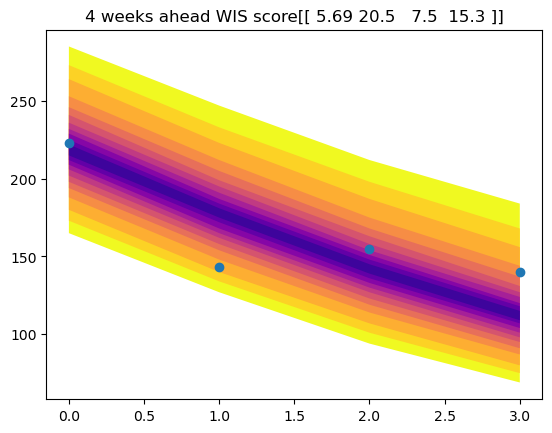

In [263]:
'''
Check if the result make sense
'''
from matplotlib.pyplot import cm

colors = cm.plasma(np.linspace(0,1,12))


for i in range(11):

    plt.fill_between(range(4), np_quantiles[i,:], np_quantiles[22-i,:], facecolor = colors[11-i], zorder = i)

plt.scatter(range(4),np_forecast,zorder=30)
plt.title('4 weeks ahead WIS score'+str(np_wis))